![Alt text](https://nextommerce.com/wp-content/uploads/2019/04/pasted-image-0.png)

<div style="border-radius:10px;
            border : black solid;
            background-color: #FFFFF;
            font-size:130%;
            font-family: Times New Roman;
            text-align: left">
    
**In this notebook, I will make the feature engineering for this dataset.** 
    
**Descriptions of Variables:**

* ****CustomerID**** : Client ID
* ****Gender**** : Client Sexuality
* ****SeniorCitizen**** : Whether the client is old (1:Yes, 0:No)
* ****Partner**** : Whether the client has a partner (Yes,No)
* ****Dependents****: Whether the client has dependents(Yes,No)
* ****tenure**** : The number of months that the client has stayed with the company
* ****PhoneService****: Whether the client has phone service(Yes or No)
* ****MultipleLines**** : Whether the client has multiple lines(Yes,No,No phone service)
* ****InternetService****: Whether the client has internet service(Yes, No, No internet service)
* ****OnlineSecurity**** : Whether the client has online security(Yes, No, No internet service)
* ****OnlineBackup**** : Whether the client has online backup(Yes, No, No internet service)
* ****DeviceProtection****: Whether the client has device protection(Yes, No, No internet service)
* ****TechSupport****: Whether the client has device protection(Yes, No, No internet service)
* ****StreamingTV****:Whether the client has streaming TV channel (Yes, No, No internet service)
* ****StreamingMovies**** :Whether the client has  streaming Movies channel(Yes, No, No internet service)
* ****Contract****: Client's contract duration(month-to-month,one year,two years) 
* ****PaperlessBiling****: Whether client has paperless invoice(Yes, No)
* ****PaymentMethod**** : The client payment method(Electronic check, mail, bank transfer(automatic),credit card(automatic)
* ****MonthlyCharges****: Monthly amount received from the client
* ****TotalCharges****: Yearly amount received from the client
* ****Churn****: Our target 

# 1. Data preprocessing

## 1.1 Importing libraries

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 1.2 Reading the dataset and first look

In [33]:
tcc = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
tcc.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
tcc.shape

(7043, 21)

In [35]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
tcc["TotalCharges"] = pd.to_numeric(tcc["TotalCharges"], errors='coerce')

In [37]:
tcc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 2. Data Quality Exploration

## 2.1 Data correctness check

In [38]:
tcc['customerID'].nunique() == tcc.shape[0]

True

In [39]:
tcc.duplicated().sum()

0

## 2.2 Missing data value check

In [40]:
tcc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [41]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending = True)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = True)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_number','Missing_percent'])
    return missing_values
    
    

In [42]:
missing(tcc)

,Missing_number,Missing_percent
customerID,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000
DeviceProtection,0,0.000000
OnlineBackup,0,0.000000


<font size = 3> **From the above exploration, we find that this dataset has no missing values. However, the absence of missing values only means that there is no None or Null, which does not exclude the possibility that there may be other values to represent the missing values, so let's explore further.**

# 3. Missing value analysis

In [43]:
tcc.loc[tcc.isnull().any(axis=1),'TotalCharges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [44]:
na_index = tcc.loc[tcc.isnull().any(axis=1),'TotalCharges'].index
na_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [45]:
tcc.iloc[na_index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<font size=3> **From above chart, we can find the missing values in the TotalChanges variable were caused by the tenure variable. It has been observed that the total amount collected from the customer comes as NaN when the number of months the customer has stayed in the company is zero. Afterwards, the monthly amounts collected from the customer were examined and it was seen that they were full. In order to solve the problem, NaN values are filled with monthly values.**

In [46]:
tcc.loc[na_index,"TotalCharges"] = tcc.loc[na_index,"MonthlyCharges"]

In [47]:
missing(tcc)

,Missing_number,Missing_percent
customerID,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0


# 4. Data re-encoding

## 4.1. Category type variable — One-Hot Encoding

<font size = 3> **For category type variables, I took the OneHotEncoding. However,for binary discrete variables, OneHotEncoding is often not practically useful. Therefore, I consider transformation of multicategorical discrete variables while retaining the original values of binary discrete variables when performing OneHotEncoding.**

In [48]:
def cate_colName(Transformer, category_cols, drop = 'if_binary'):
    cate_cols_new = []
    col_value = Transformer.categories_
    
    for i, j in enumerate(category_cols):
        if (drop == 'if_binary') & (len(col_value[i]) == 2):
            cate_cols_new.append(j)
        else:
            for f in col_value[i]:
                feature_name = j + '_' + f
                cate_cols_new.append(feature_name)            
    return cate_cols_new    

In [49]:
enc = OneHotEncoder(drop = 'if_binary')

In [50]:
category_cols = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
df_cate = tcc[category_cols]

In [51]:
enc.fit(df_cate)

OneHotEncoder(drop='if_binary')

In [52]:
df_cate = pd.DataFrame(enc.transform(df_cate).toarray(), columns = cate_colName(enc, category_cols))
df_cate

,gender,Partner,Dependents,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 4.2 Continuous type variable — Standardization

In [53]:
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_cont = scaler.fit_transform(tcc[continuous_cols])
df_cont = pd.DataFrame(df_cont, columns = ['tenure', 'MonthlyCharges', 'TotalCharges'])
df_cont.head(5)

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992667
1,0.066327,-0.259629,-0.172198
2,-1.236724,-0.362660,-0.958122
3,0.514251,-0.746535,-0.193706
4,-1.236724,0.197365,-0.938930


# 5. Feature Importance

In [54]:
X = pd.concat([df_cate,df_cont,tcc[['SeniorCitizen']]], axis=1 )
Y = tcc['Churn']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=17)

In [56]:
rf_model = RandomForestClassifier(random_state=46).fit(x_train, y_train)

In [57]:
y_pred = rf_model.predict(x_test)

In [58]:
accuracy_score(y_pred, y_test)

print("Accuracy Score: ", accuracy_score(y_pred, y_test))

Accuracy Score:  0.7789872219592996


In [59]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

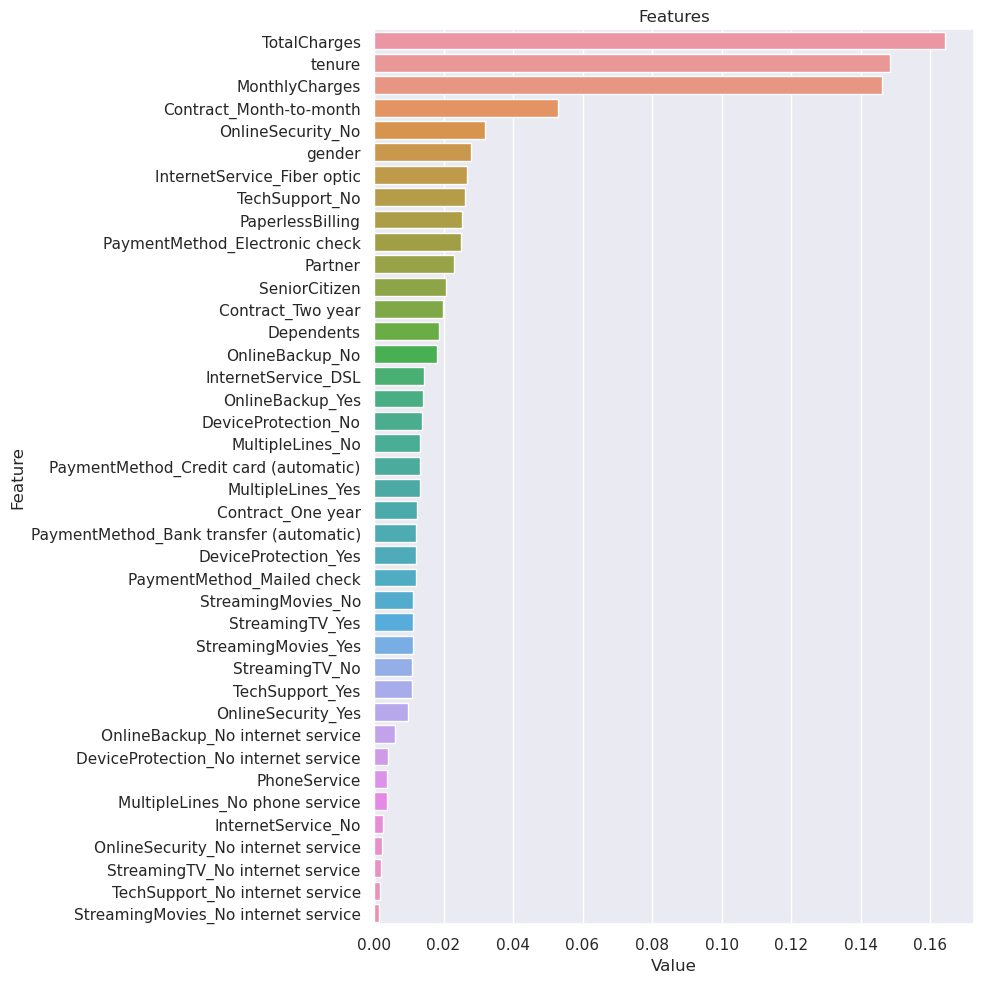

In [60]:
plot_importance(rf_model, x_train)